In [1]:
#导入库
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
# 导入实例数据
import pandas_datareader as pdr
from datetime import datetime

from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() 

In [4]:
start = datetime(2015, 9, 1)
end = datetime.today() 
alibaba = pdr.get_data_yahoo('BABA', start, end)

[*********************100%***********************]  1 of 1 downloaded


# 直方图与密度图

In [ ]:
参数：
- hist: True 表示直方图
- kde: True 表示密度图
- bins: 分组数
- rug: 表示分布情况（密度）
    
hist ked 同时为true表示同时绘制两个图

In [7]:
# 阿里巴巴2018年前3个月股票数据
alibaba_2018 = alibaba['2018']

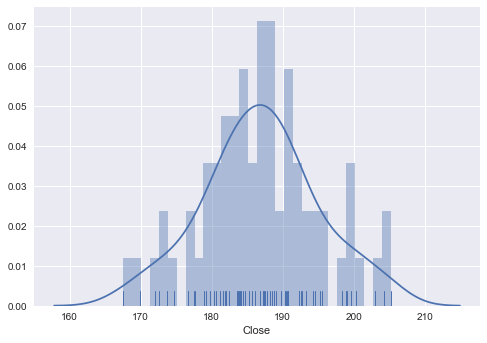

In [33]:
# 阿里巴巴成交量直方图（频数直方图）
sns.distplot(alibaba_2018['Close'], hist=True, bins= 30, kde = True, rug=True)

## 密度图

单独绘制密度图

参数：
- shade 填充
- color 填充颜色

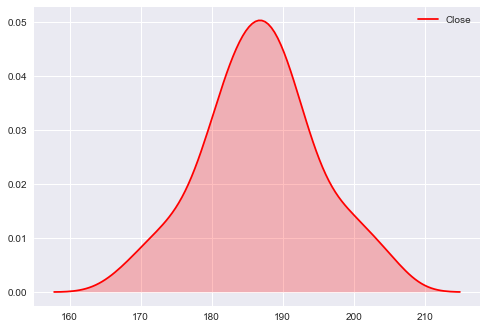

In [36]:
sns.kdeplot(alibaba_2018['Close'], shade=True, color='r')

# seaborn 调用matplotlib

可以通过sns.plt去调用matplotlib的函数

In [ ]:
# 用matplotlib画直方图
sns.plt.hist()

# 热力图

In [ ]:
参数：
- annot: True表示要在图中显示数据
- fmt: 显示在图中数据的格式；格式与c语言printf很类似，如显示小数点后2位小数 fmt='.2f'
    'd' 表示整数
    'f' 表示浮点数

In [ ]:
# 获取阿里巴巴每个月的总成交量
# 下面有几种方法

In [43]:
# 1. 分组求和
df1 = alibaba.groupby([lambda x: x.year, lambda x: x.month])['Volume'].sum().unstack(0).fillna(0)

In [49]:
# 2. 透视表

# 这里格式诡异的原因是希望结果是DataFrame，方便后面添加列
# 也可以用正常写法得到Series，然后再创建一个DataFrame
#  alibaba_month = alibaba.resample('M').sum()['Volume'] 或 alibaba.resample('M')['Volume'].sum()

alibaba_month = alibaba.resample('M').sum().loc[:,'Volume':'Volume']

# 添加月份列
alibaba_month['month'] = alibaba_month.index.map(lambda x : x.month)

# 添加年份列
alibaba_month['year'] = alibaba_month.index.map(lambda x : x.year)

# 透视表显示每年每个月的成交量
df1 = pd.pivot_table(alibaba_month, index='month', values='Volume', columns='year', fill_value=0)

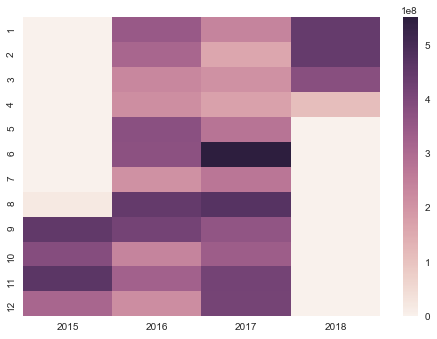

In [23]:
# 绘制热力图

sns.heatmap(df1)

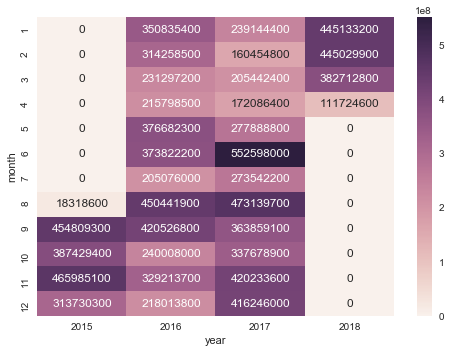

In [50]:
# 在图中添加数据显示

sns.heatmap(df1, annot=True, fmt='.0f')

# 柱状图

In [ ]:
# 获取阿里巴巴每天的成交量

In [93]:
# 可以直接使用前面的数据
df2 = df1.sum()

In [85]:
# 也可以重新获取
# 注意，这种方式获取后索引需要调整为年，以方便画图

df2 = alibaba.resample('Y').sum()['Volume']

In [88]:
df2.index = df2.index.map(lambda x: x.year)

In [89]:
df2

Date
2015    1.640273e+09
2016    3.725974e+09
2017    3.892314e+09
2018    1.384600e+09
Name: Volume, dtype: float64

D:\Anaconda2\envs\py3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


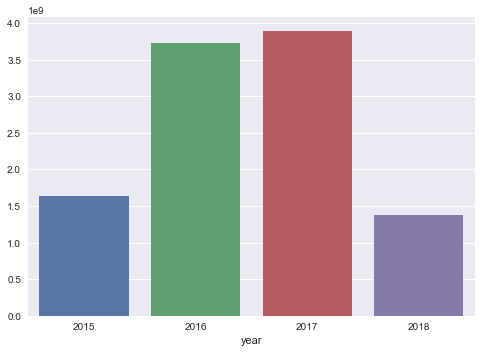

In [94]:
sns.barplot(x=df2.index, y=df2.values)